In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore/Superstore.xls


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statistics import mean
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
import eli5

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


## **Data Exploration**

In [4]:
ss = pd.read_excel('/kaggle/input/superstore/Superstore.xls')
ss.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
ss1 = ss.copy()

In [6]:
ss1.shape

(9994, 21)

In [7]:
ss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [8]:
ss1.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
ss1.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
ss1.duplicated().sum()

0

In [11]:
ss1.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

In [12]:
ss1.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [13]:
ss1.cov()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,8.324169e+06,8.946577e+05,-2442.819776,-25.782598,8.029358,8446.585421
Postal Code,8.946577e+05,1.028080e+09,-476682.766590,910.415885,386.870404,-225045.849445
Sales,-2.442820e+03,-4.766828e+05,388434.455308,278.459923,-3.627228,69944.096586
Quantity,-2.578260e+01,9.104159e+02,278.459923,4.951113,0.003961,34.534769
Discount,8.029358e+00,3.868704e+02,-3.627228,0.003961,0.042622,-10.615173
Profit,8.446585e+03,-2.250458e+05,69944.096586,34.534769,-10.615173,54877.798055


In [14]:
# LIST OF COLUMNS WITH NUMERICAL FEATURES
num_cols = [feature for feature in ss1.columns if ss1[feature].dtypes != 'O']
date_cols = [feature for feature in num_cols if 'Date' in feature or 'Year' in feature]

def get_num_feat(x, y):
    complement = [item for item in x if item not in y]
    return complement

numeric = get_num_feat(num_cols, date_cols)
numeric.remove('Row ID')
numeric.remove('Postal Code')
numeric

['Sales', 'Quantity', 'Discount', 'Profit']

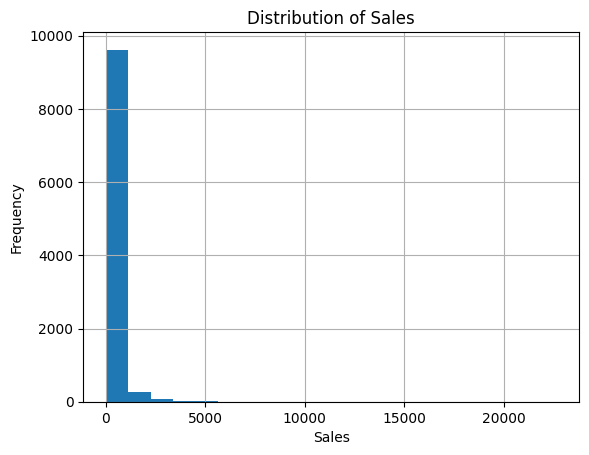

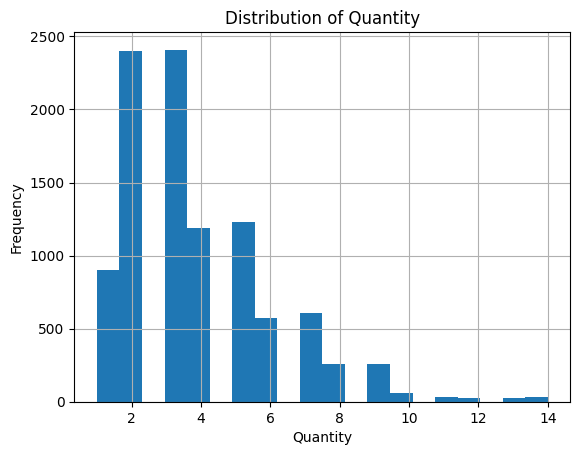

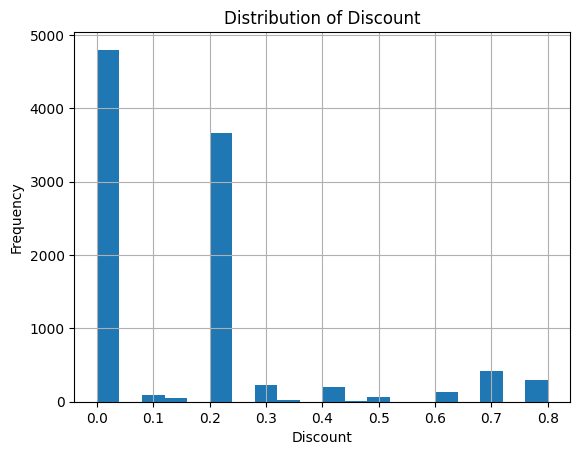

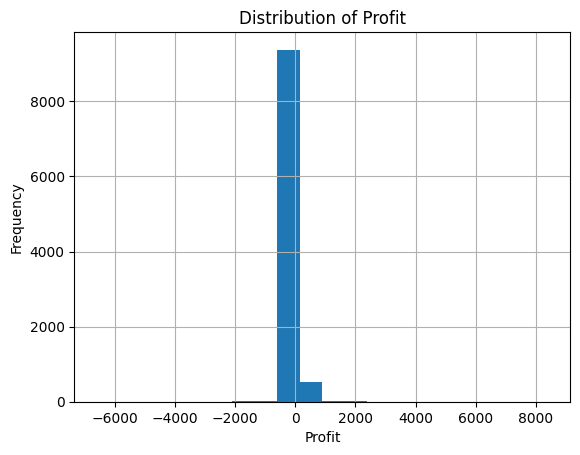

Sales:
  Skewness: 12.970805179533524
  Kurtosis: 305.1584268174972

Quantity:
  Skewness: 1.2783528478702606
  Kurtosis: 1.9902926633130011

Discount:
  Skewness: 1.6840419409939928
  Kurtosis: 2.4077404949462338

Profit:
  Skewness: 7.56029661947754
  Kurtosis: 396.9892286014973



In [15]:
# Calculate skewness and kurtosis
skewness = [stats.skew(ss1[column]) for column in numeric]
kurtosis = [stats.kurtosis(ss1[column]) for column in numeric]

# Visualize the distribution using histograms
for column in numeric:
    plt.figure()
    ss1[column].hist(bins=20)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Print the skewness, kurtosis, and outliers
for i, column in enumerate(numeric):
    print(f"{column}:")
    print(f"  Skewness: {skewness[i]}")
    print(f"  Kurtosis: {kurtosis[i]}\n")

In [16]:
data = ss1[numeric]

# Apply additional outlier detection techniques
# Z-score method
z_scores = (data - np.mean(data)) / np.std(data)
z_score_threshold = 3
outliers_zscore = data[z_scores.abs() > z_score_threshold]

# IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

# Combine outliers from both methods
outliers = pd.concat([outliers_zscore, outliers_iqr])

# Print the outliers
print("Outliers:")
print(outliers)

Outliers:
      Sales  Quantity  Discount  Profit
0       NaN       NaN       NaN     NaN
1       NaN       NaN       NaN     NaN
2       NaN       NaN       NaN     NaN
3       NaN       NaN       NaN     NaN
4       NaN       NaN       NaN     NaN
...     ...       ...       ...     ...
9989    NaN       NaN       NaN     NaN
9990    NaN       NaN       NaN     NaN
9991    NaN       NaN       NaN     NaN
9992    NaN       NaN       NaN     NaN
9993    NaN       NaN       NaN  72.948

[19988 rows x 4 columns]


In [17]:
outliers=outliers.dropna(how='all')
outliers

,Sales,Quantity,Discount,Profit
14,NaN,NaN,0.8,NaN
15,NaN,NaN,0.8,NaN
27,3083.43,NaN,NaN,-1665.0522
75,NaN,NaN,0.8,NaN
101,NaN,NaN,0.8,NaN
...,...,...,...,...
9962,NaN,NaN,NaN,-67.6704
9968,735.98,NaN,NaN,331.1910
9979,NaN,14.0,NaN,153.1152
9984,NaN,10.0,NaN,NaN


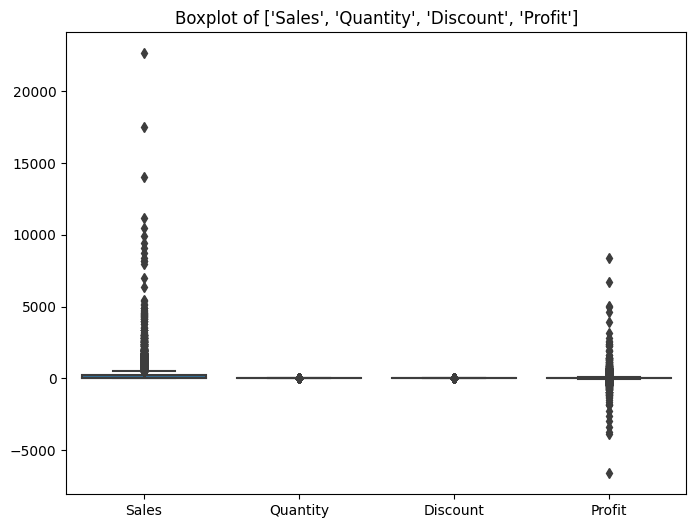

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=ss1[numeric])
plt.title(f"Boxplot of {numeric}")
plt.show()

In [19]:
# Initialize an empty dictionary to store zero counts
zero_counts = {}

# Iterate over each column in the dataset
for column in ss1.columns:
    # Count the number of zeros in the column
    zero_count = (ss1[column] == 0).sum()
    
    # Store the zero count in the dictionary
    zero_counts[column] = zero_count

# Print the zero counts for each column
for column, count in zero_counts.items():
    print(f"Column '{column}': {count} zero entries")

Column 'Row ID': 0 zero entries
Column 'Order ID': 0 zero entries
Column 'Order Date': 0 zero entries
Column 'Ship Date': 0 zero entries
Column 'Ship Mode': 0 zero entries
Column 'Customer ID': 0 zero entries
Column 'Customer Name': 0 zero entries
Column 'Segment': 0 zero entries
Column 'Country': 0 zero entries
Column 'City': 0 zero entries
Column 'State': 0 zero entries
Column 'Postal Code': 0 zero entries
Column 'Region': 0 zero entries
Column 'Product ID': 0 zero entries
Column 'Category': 0 zero entries
Column 'Sub-Category': 0 zero entries
Column 'Product Name': 0 zero entries
Column 'Sales': 0 zero entries
Column 'Quantity': 0 zero entries
Column 'Discount': 4798 zero entries
Column 'Profit': 65 zero entries


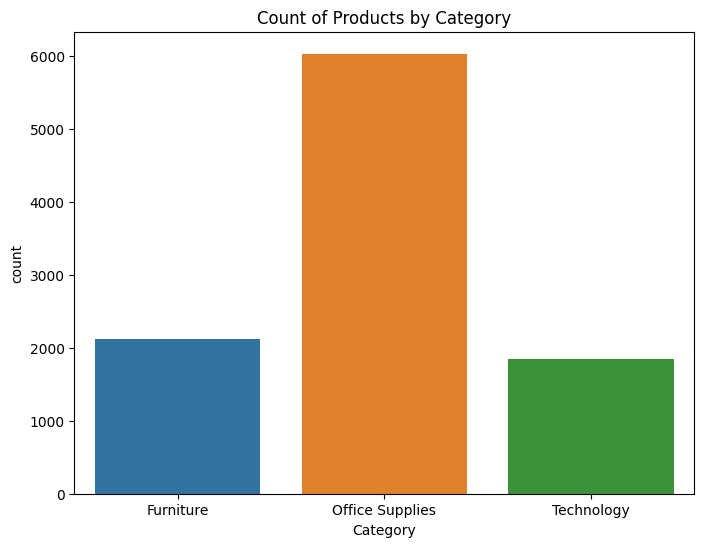

In [20]:
# Bar plot of 'Category'
plt.figure(figsize=(8, 6))
sns.countplot(data=ss1, x='Category')
plt.title('Count of Products by Category')
plt.show()

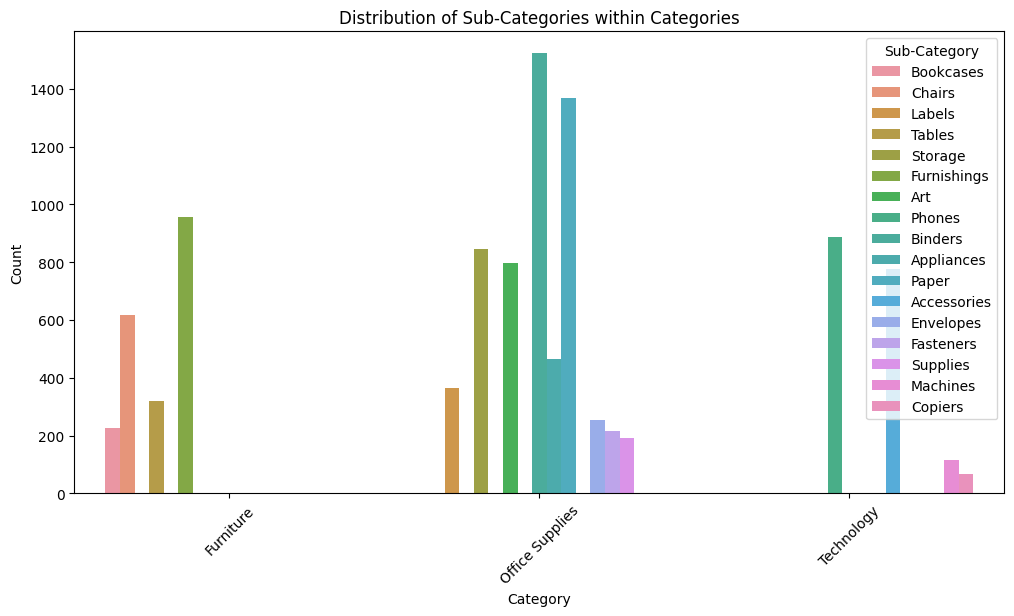

In [21]:
# Plot the distribution of sub-categories within the category column
plt.figure(figsize=(12, 6))
sns.countplot(data=ss1, x='Category', hue='Sub-Category')
plt.title('Distribution of Sub-Categories within Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sub-Category')
plt.show()

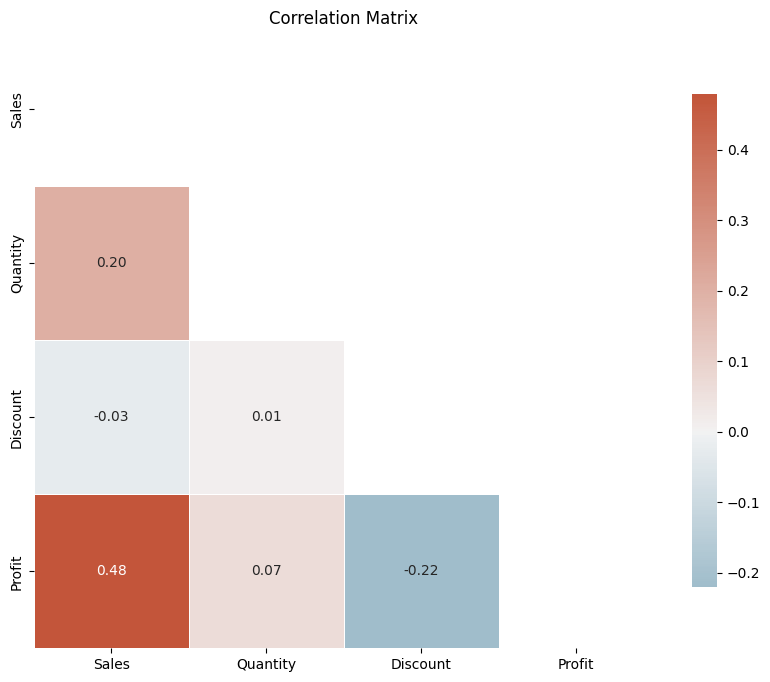

In [22]:
# Correlation Analysis
correlation_matrix = ss1[numeric].corr()
# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Set up the matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))
# Generate a colormap for the correlation plot
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Plot the correlation matrix with masked upper triangle
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0, annot=True, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.8})
# Set plot title
plt.title('Correlation Matrix')
# Show the plot
plt.show()

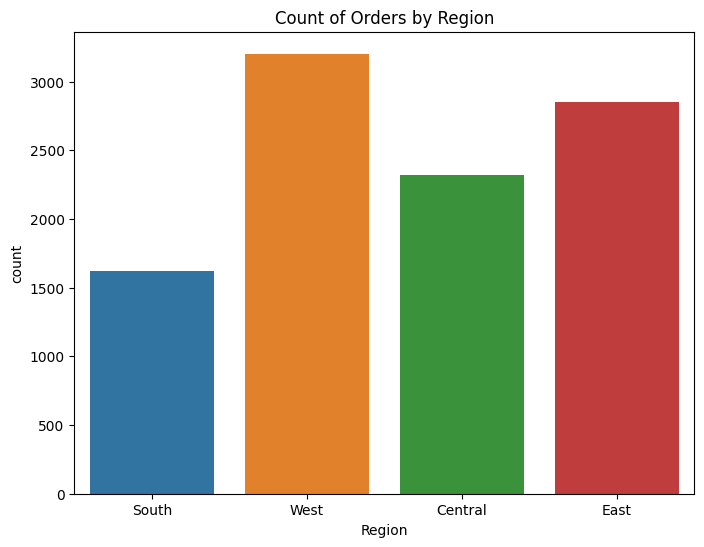

In [23]:
# Bar plot of 'Region'
plt.figure(figsize=(8, 6))
sns.countplot(data=ss1, x='Region')
plt.title('Count of Orders by Region')
plt.show()

<AxesSubplot: ylabel='Segment'>

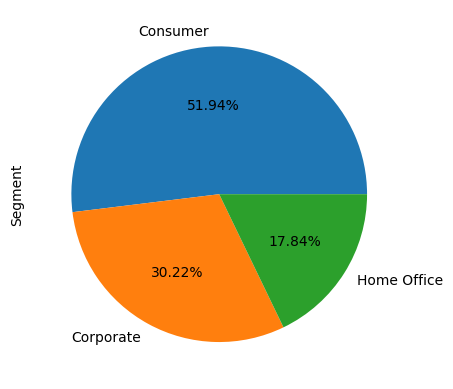

In [24]:
ss1['Segment'].value_counts().plot.pie(autopct='%1.2f%%')

<AxesSubplot: >

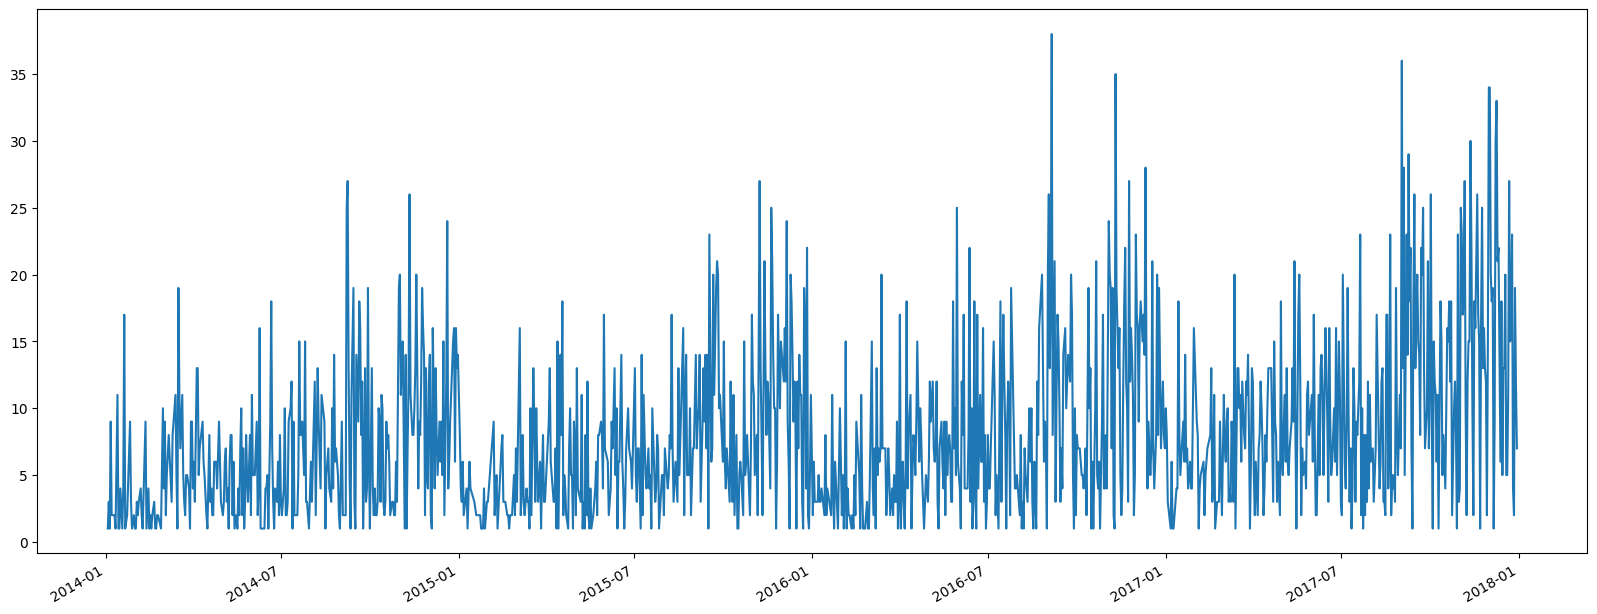

In [25]:
ss1['Order Date'].value_counts().plot.line(figsize=(20,8))

<AxesSubplot: >

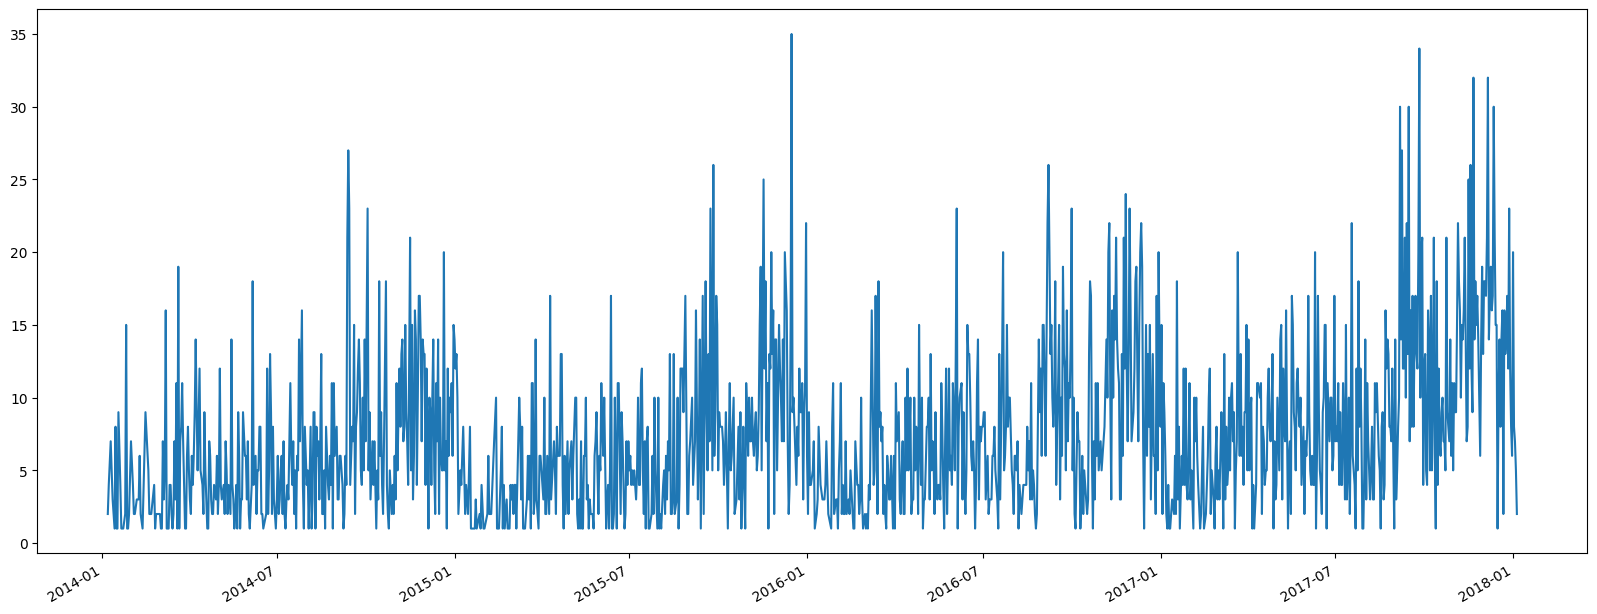

In [26]:
ss1['Ship Date'].value_counts().plot.line(figsize=(20,8))

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64


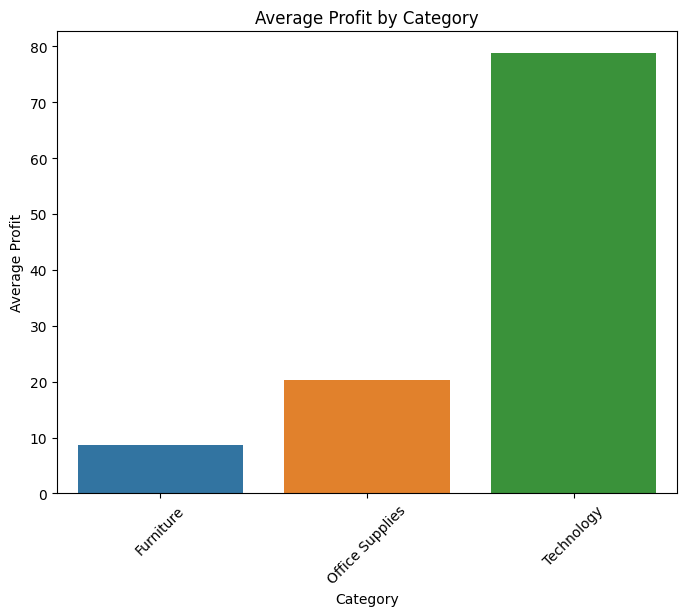

In [27]:
# Find average profit by category
avg_profit_by_category = ss1.groupby('Category')['Profit'].mean()
print(avg_profit_by_category)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_profit_by_category.index, y=avg_profit_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.title('Average Profit by Category')
plt.xticks(rotation=45)
plt.show()

Category
Furniture          349.834887
Office Supplies    119.324101
Technology         452.709276
Name: Sales, dtype: float64


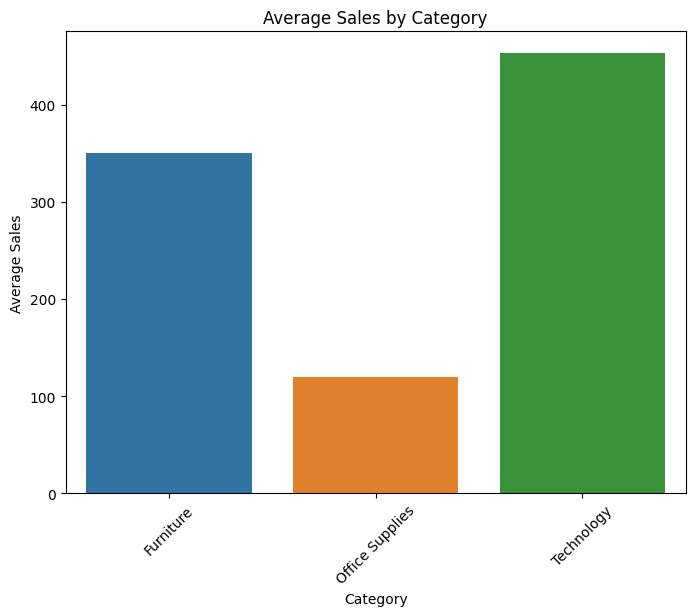

In [28]:
# Average Sales by Category
avg_sales_by_category = ss1.groupby('Category')['Sales'].mean()
print(avg_sales_by_category)

plt.figure(figsize=(8, 6))
sns.barplot(x=avg_sales_by_category.index, y=avg_sales_by_category.values)
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.title('Average Sales by Category')
plt.xticks(rotation=45)
plt.show()

Segment    Consumer   Corporate  Home Office
Region                                      
Central   8564.0481  18703.9020   12438.4124
East     41190.9843  23622.5789   26709.2168
South    26913.5728  15215.2232    4620.6343
West     57450.6040  34437.4299   16530.4150


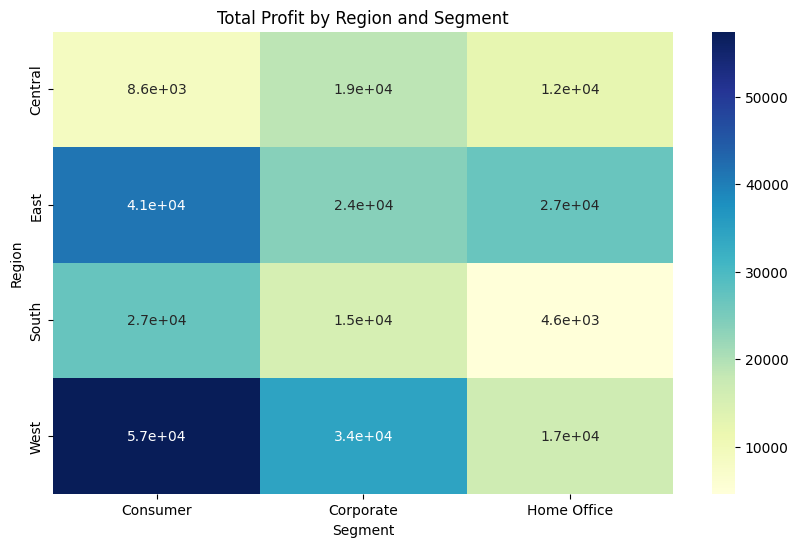

In [29]:
# Total Profit by Region and Segment
total_profit_by_region_segment = ss1.groupby(['Region', 'Segment'])['Profit'].sum().unstack()
print(total_profit_by_region_segment)

plt.figure(figsize=(10, 6))
sns.heatmap(total_profit_by_region_segment, annot=True, cmap='YlGnBu')
plt.xlabel('Segment')
plt.ylabel('Region')
plt.title('Total Profit by Region and Segment')
plt.show()

Category  Furniture  Office Supplies  Technology
Region                                          
Central        1827             5409        1544
East           2214             6462        1942
South          1291             3800        1118
West           2696             7235        2335


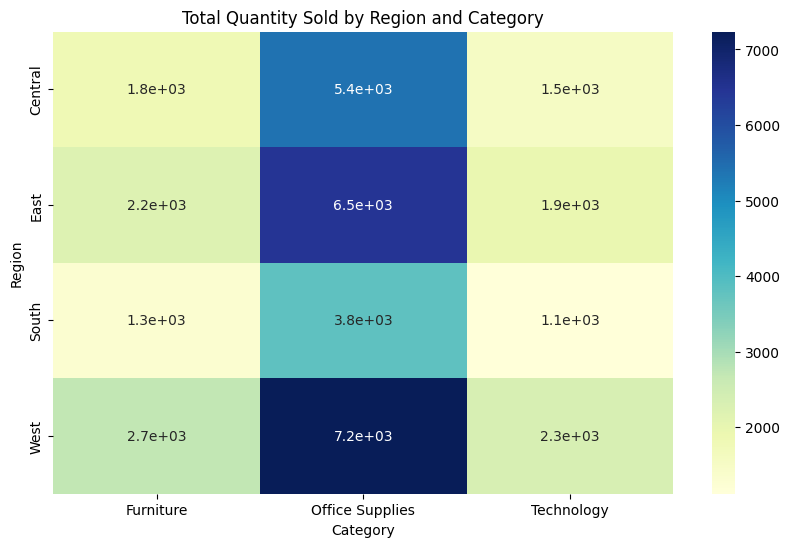

In [30]:
# Total Quantity Sold by Region and Category
quantity = ss1.pivot_table(values='Quantity', index='Region', columns='Category', aggfunc='sum')
print(quantity)

plt.figure(figsize=(10, 6))
sns.heatmap(quantity, annot=True, cmap='YlGnBu')
plt.xlabel('Category')
plt.ylabel('Region')
plt.title('Total Quantity Sold by Region and Category')
plt.show()

Segment         Consumer  Corporate  Home Office
Ship Mode                                       
First Class     0.161131   0.171381     0.162465
Same Day        0.159779   0.143860     0.140179
Second Class    0.142314   0.138079     0.129430
Standard Class  0.162460   0.162384     0.149010


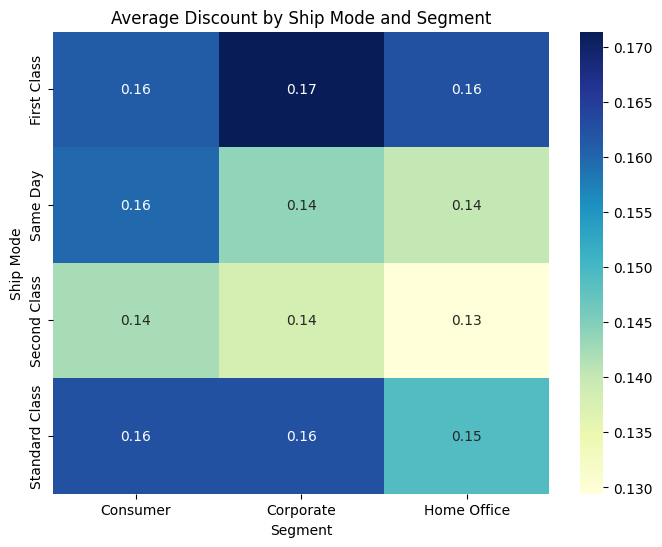

In [31]:
# Average Discount by Ship Mode and Segment
discount = ss1.pivot_table(values='Discount', index='Ship Mode', columns='Segment', aggfunc='mean')
print(discount)

plt.figure(figsize=(8, 6))
sns.heatmap(discount, annot=True, cmap='YlGnBu')
plt.xlabel('Segment')
plt.ylabel('Ship Mode')
plt.title('Average Discount by Ship Mode and Segment')
plt.show()

                         Profit      Sales
State                                     
Indiana               8399.9760  17499.950
Washington            6719.9808  13999.960
Delaware              5039.9856  10499.970
Michigan              4946.3700   9892.740
Minnesota             4630.4755   9449.950
New York              3919.9888  11199.968
Georgia               3177.4750   6354.950
Virginia              2799.9840   8749.950
Rhode Island          2591.9568   5399.910
New Jersey            2365.9818   9099.930
Missouri              2302.9671   4899.930
California            1906.4850   8187.650
Nevada                1644.2913   4535.976
Alabama               1459.2000   3040.000
Kentucky              1416.8000   3080.000
Montana               1379.9770   2999.950
Maryland              1270.9900   2541.980
Pennsylvania          1119.9968   8399.976
Vermont               1013.1270   4404.900
Illinois               874.9875   2799.960
Arkansas               843.1706   1793.980
Nebraska   

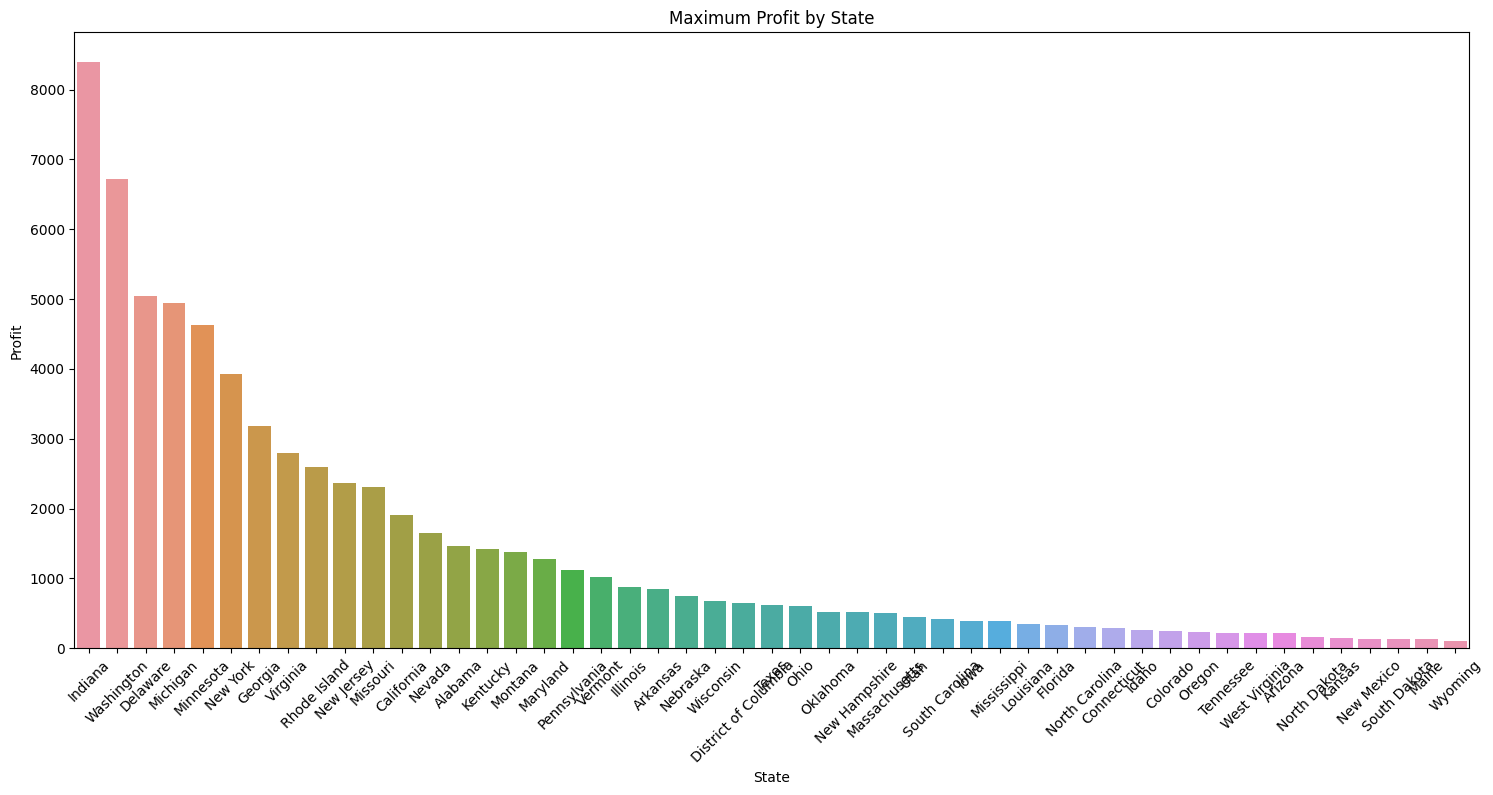

In [32]:
# Maximum Profit and Sales by State
agg_max_profit_sales = ss1.groupby('State').agg({'Profit': 'max', 'Sales': 'max'}).sort_values(by='Profit', ascending=False)
print(agg_max_profit_sales)

plt.figure(figsize=(18, 8))
sns.barplot(data=agg_max_profit_sales, x=agg_max_profit_sales.index, y='Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Maximum Profit by State')
plt.xticks(rotation=45)
plt.show()

                 Profit      Sales
Sub-Category                      
Accessories    829.3754   3347.370
Appliances     793.7160   2625.120
Art            112.5740   1113.024
Binders       4946.3700   9892.740
Bookcases     1013.1270   4404.900
Chairs         770.3520   4416.174
Copiers       8399.9760  17499.950
Envelopes      204.0714    604.656
Fasteners       21.8880     93.360
Furnishings    387.5676   1336.440
Labels         385.3752    786.480
Machines      2799.9840  22638.480
Paper          352.2960    733.950
Phones        1228.1787   4548.810
Storage        792.2691   2934.330
Supplies       327.5060   8187.650
Tables         629.0100   4297.644


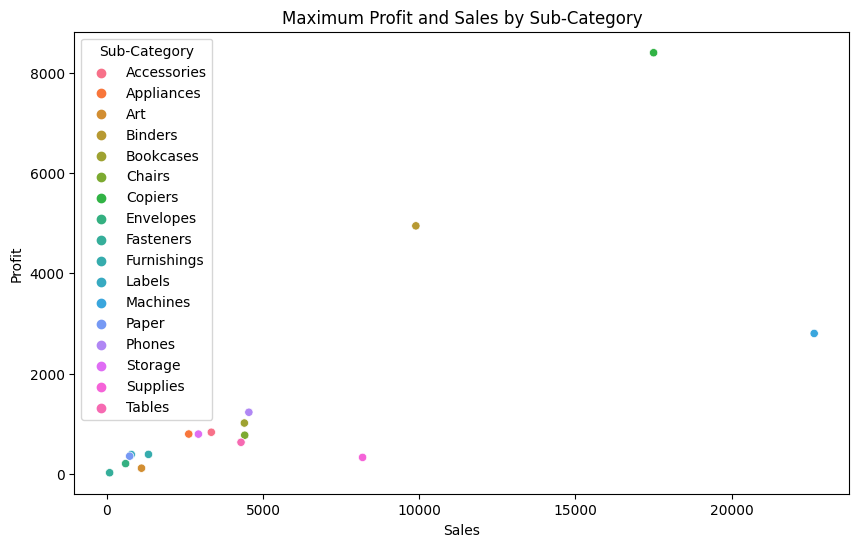

In [33]:
# Maximum Profit and Sales by Sub-Category
agg_max_profit_sales = ss1.groupby('Sub-Category').agg({'Profit': 'max', 'Sales': 'max'})
print(agg_max_profit_sales)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sales', y='Profit', data=agg_max_profit_sales, hue='Sub-Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Maximum Profit and Sales by Sub-Category')
plt.show()

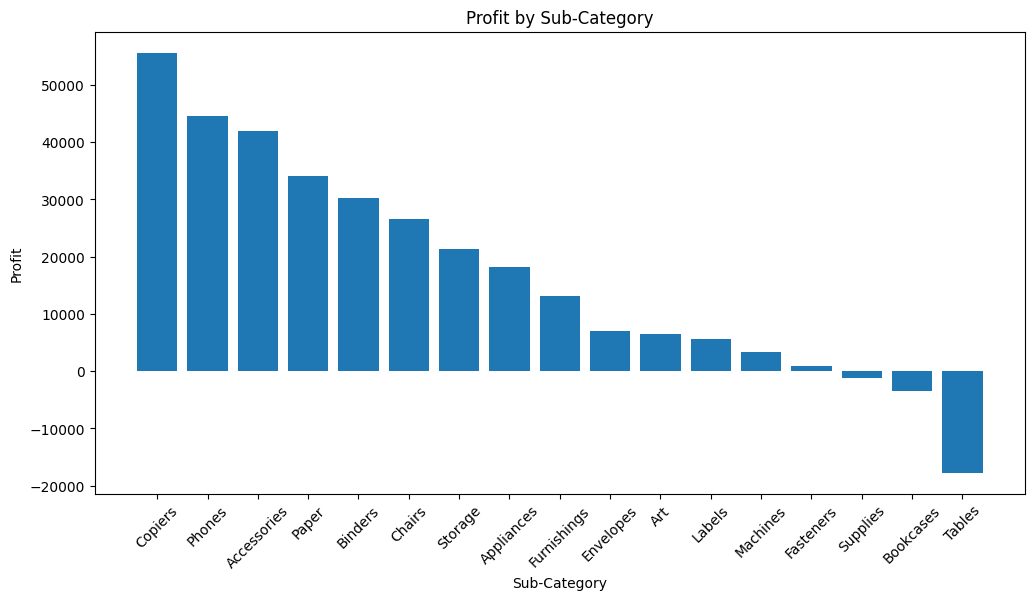

In [34]:
# Group the data by sub-category and calculate the sum of profit
profit_by_subcategory = ss1.groupby('Sub-Category')['Profit'].sum().reset_index()

# Sort the data by profit in descending order
profit_by_subcategory = profit_by_subcategory.sort_values('Profit', ascending=False)

# Plot the profit for each sub-category
plt.figure(figsize=(12, 6))
plt.bar(profit_by_subcategory['Sub-Category'], profit_by_subcategory['Profit'])
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

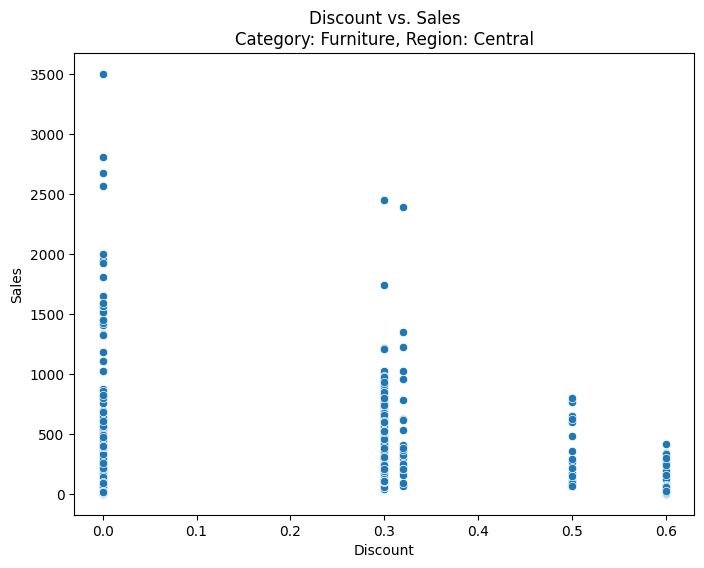

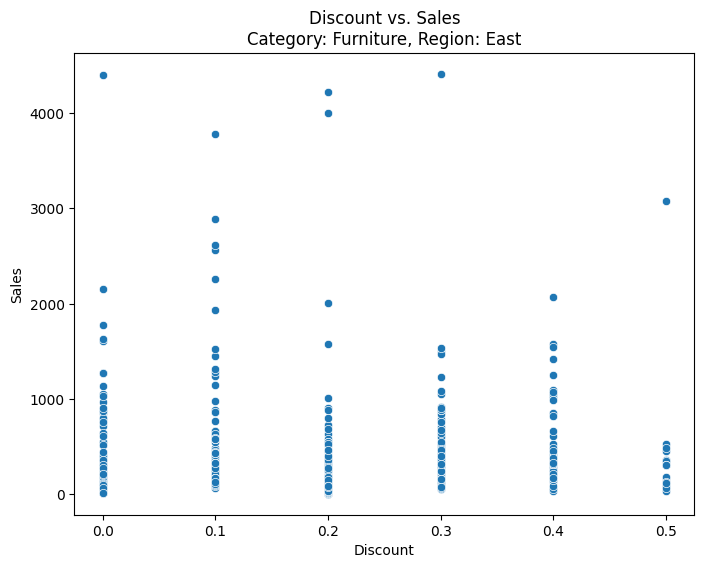

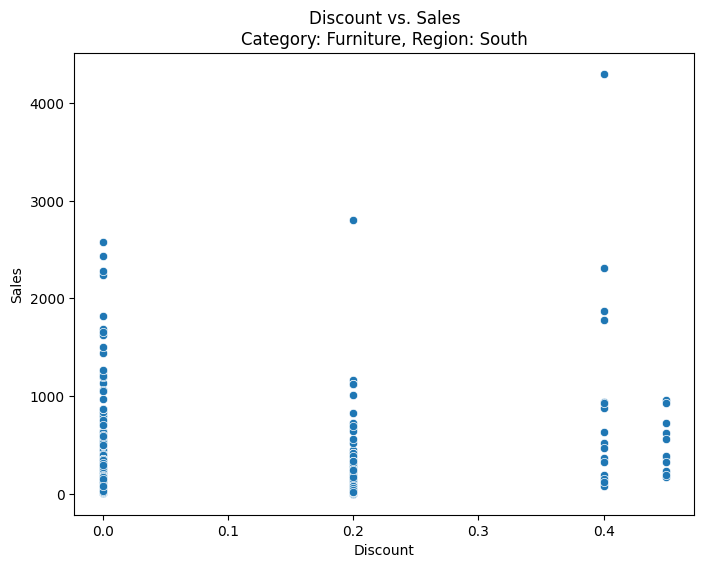

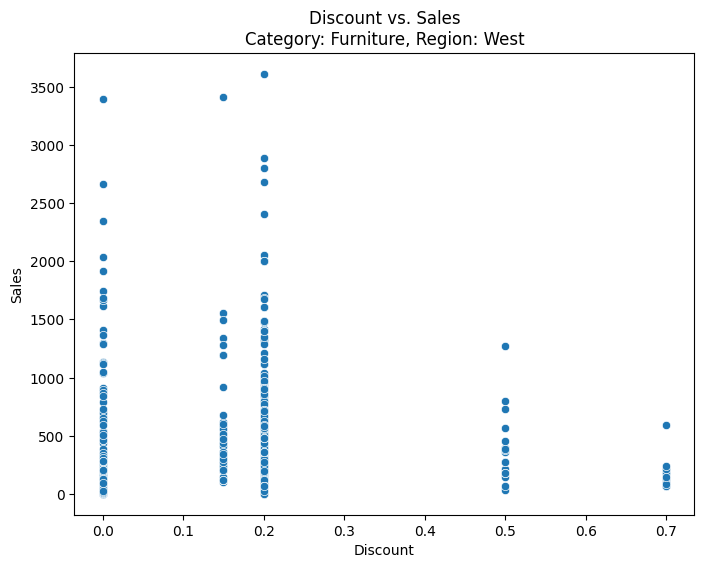

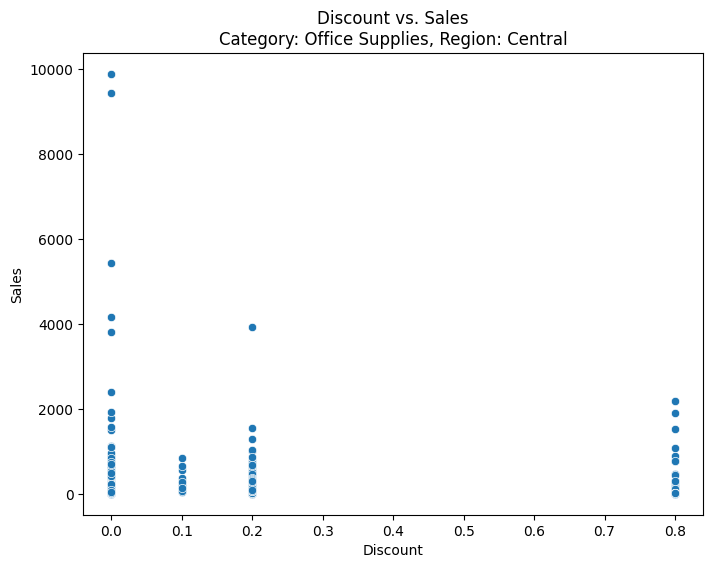

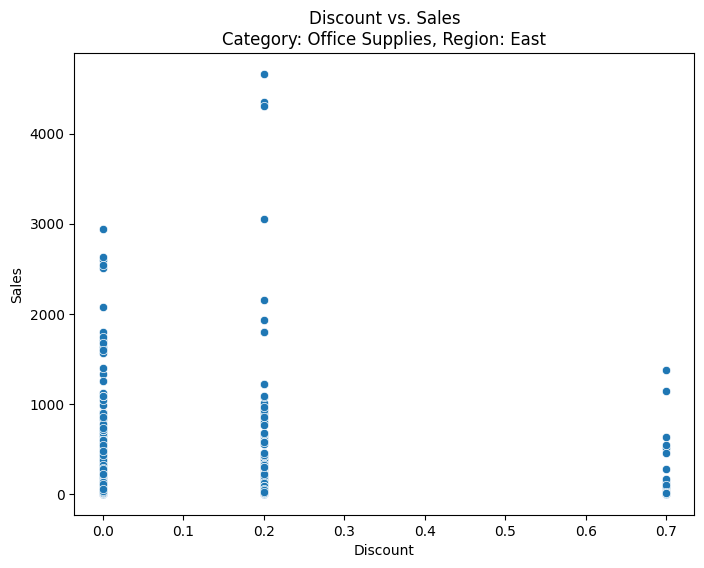

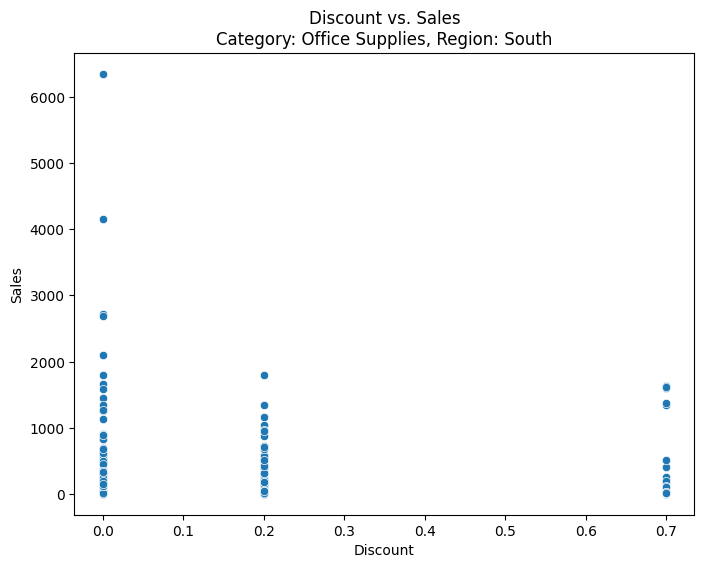

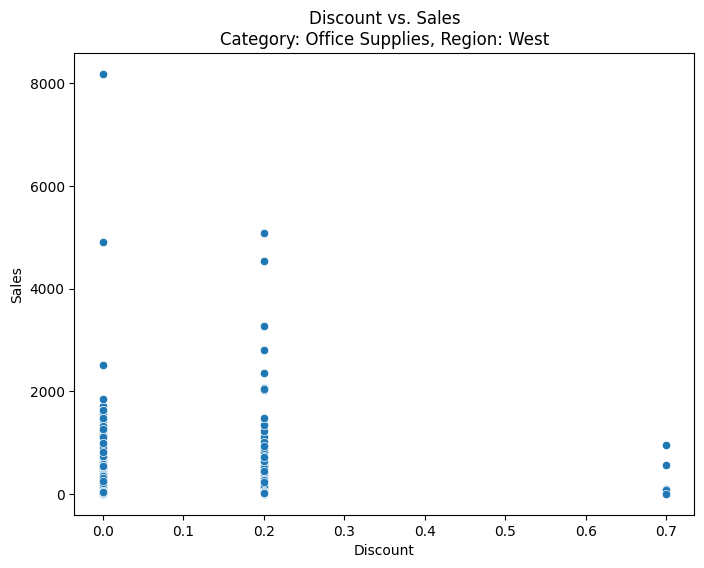

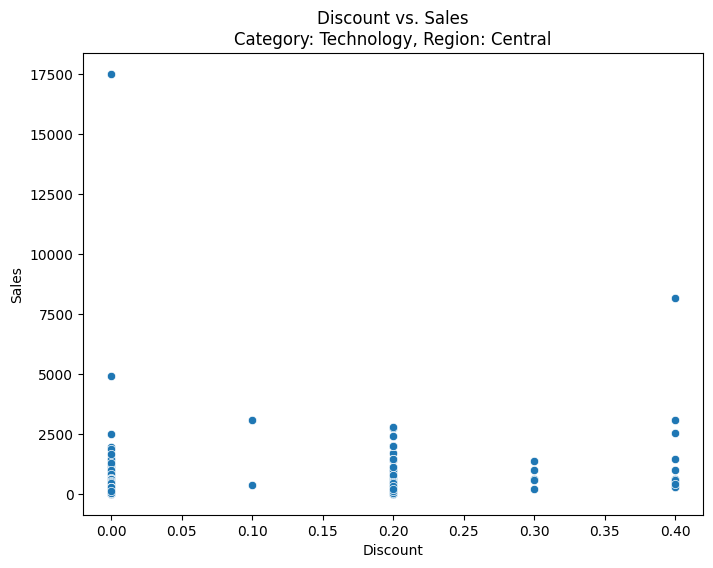

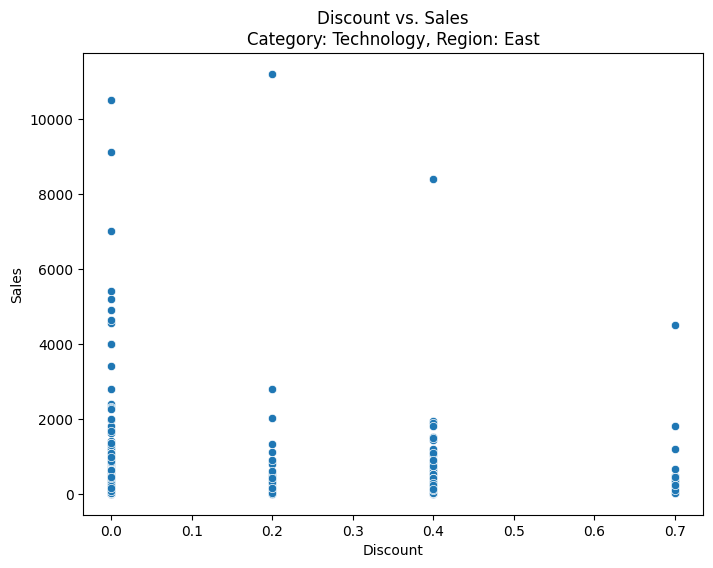

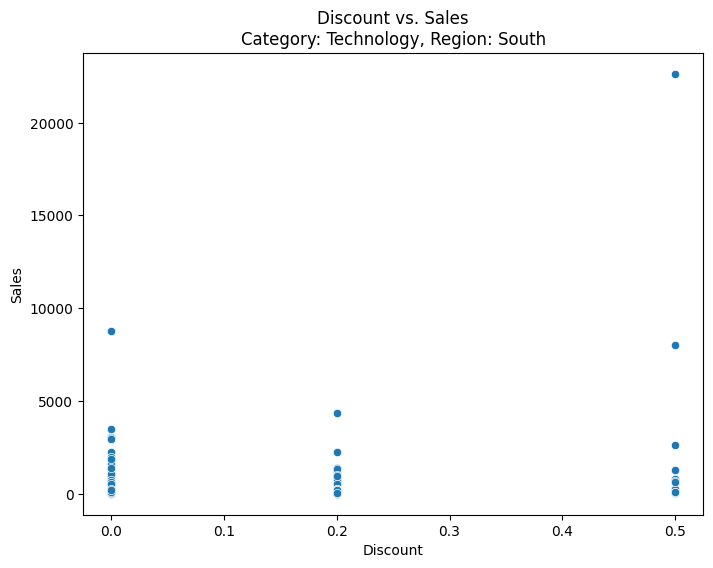

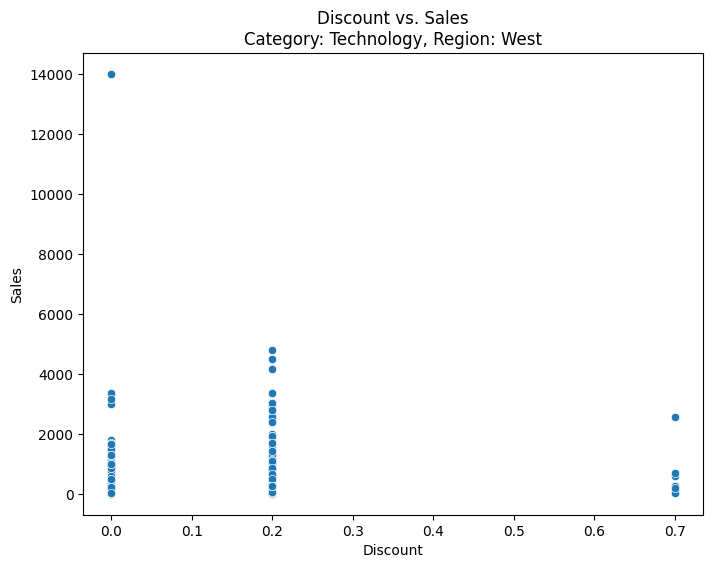

In [35]:
# Group the data by category and region
grouped_data = ss1.groupby(['Category', 'Region'])

# Iterate over each group and create scatter plot
for group_name, group_data in grouped_data:
    category, region = group_name
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=group_data, x='Discount', y='Sales')
    plt.title(f"Discount vs. Sales\nCategory: {category}, Region: {region}")
    plt.xlabel('Discount')
    plt.ylabel('Sales')
    plt.show()

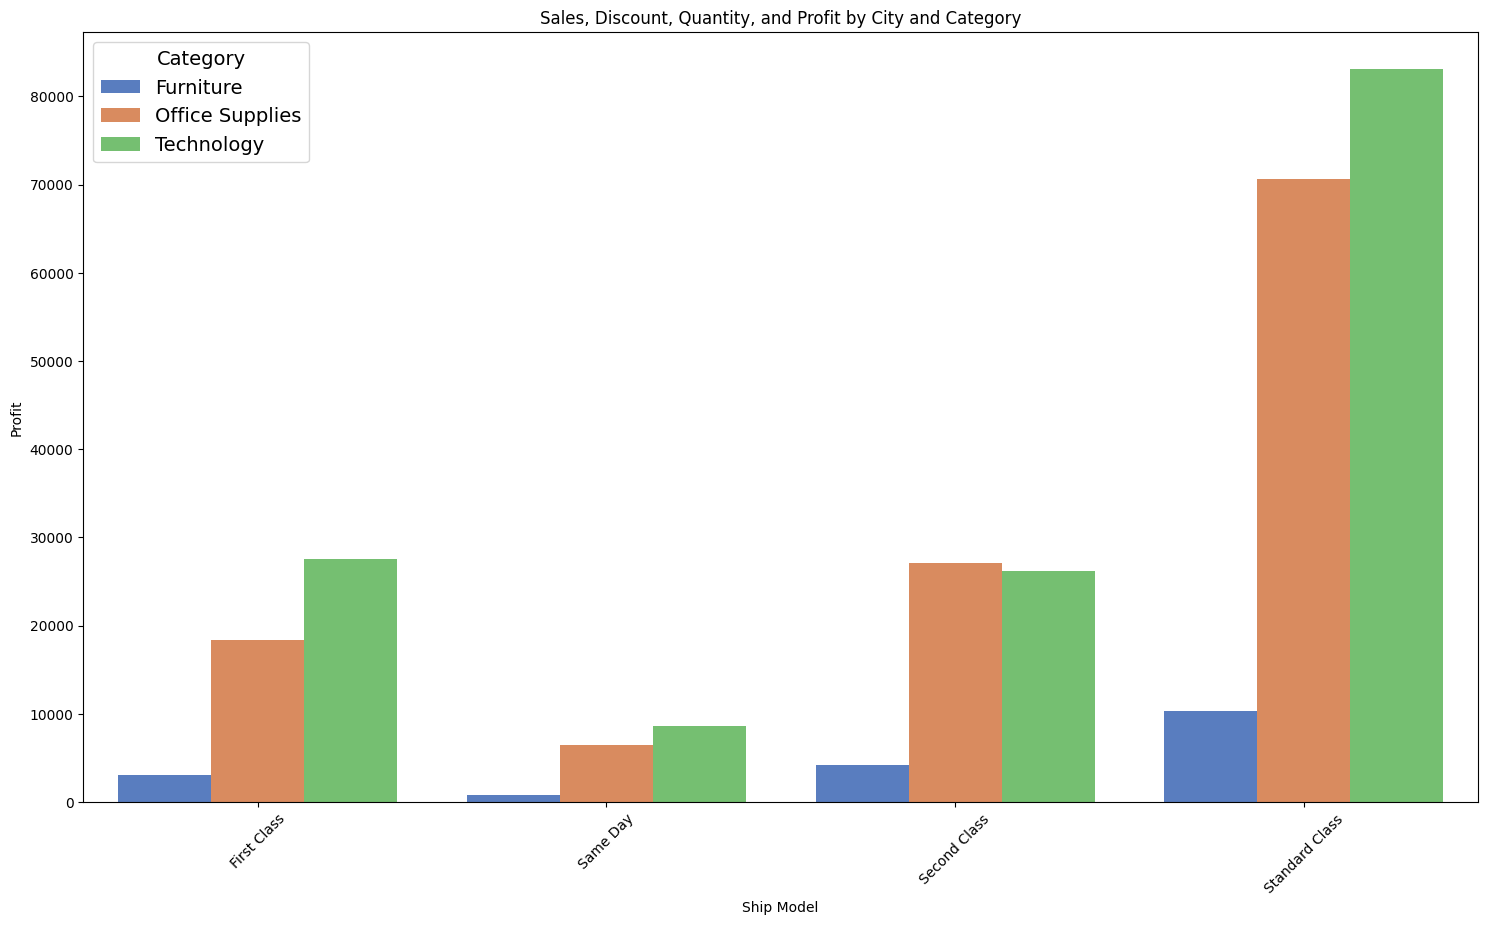

In [36]:
# Group the data by city and category, and calculate the sum of sales, discount, quantity, and profit
data = ss1.groupby(['Ship Mode', 'Category']).agg({'Sales': 'sum', 'Discount': 'sum',
                                                                 'Quantity': 'sum', 'Profit': 'sum'}).reset_index()

# Plot the grouped bar plot
plt.figure(figsize=(18, 10))
sns.barplot(data=data, x='Ship Mode', y='Profit', hue='Category', palette='muted')
plt.title('Sales, Discount, Quantity, and Profit by City and Category')
plt.rcParams.update({'font.size':14})
plt.xlabel('Ship Model')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

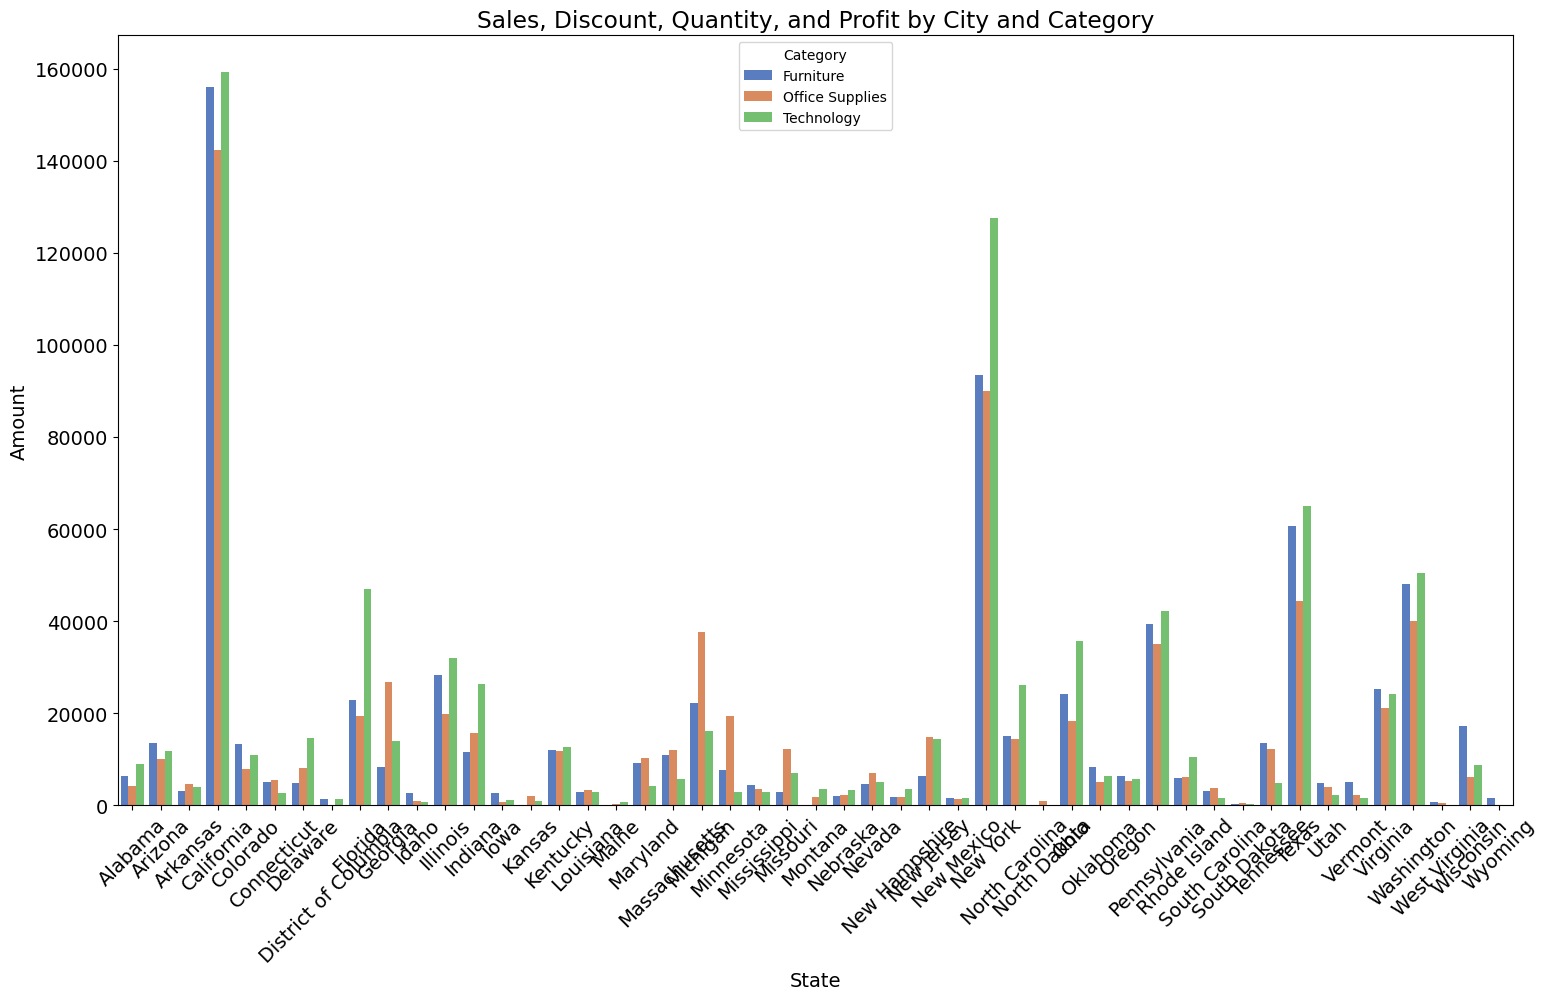

In [37]:
# Group the data by city and category, and calculate the sum of sales, discount, quantity, and profit
data = ss1.groupby(['State', 'Category']).agg({'Sales': 'sum', 'Discount': 'sum',
                                                                 'Quantity': 'sum', 'Profit': 'sum'}).reset_index()

# Plot the grouped bar plot
plt.figure(figsize=(18, 10))
sns.barplot(data=data, x='State', y='Sales', hue='Category', palette='muted')
plt.title('Sales, Discount, Quantity, and Profit by City and Category')
plt.rcParams.update({'font.size':10})
plt.xlabel('State')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

In [38]:
# Top 5 cities where loss is high
ss1.groupby(by='City').sum().sort_values('Profit', ascending=True).head(5)

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,,
Philadelphia,2531454,10275302,109077.0130,1981,175.50,-13837.7674
Houston,2017125,29052387,64504.7604,1466,143.14,-10153.5485
San Antonio,263170,4614213,21843.5280,247,22.60,-7299.0502
Lancaster,257562,1980720,9891.4640,171,14.50,-7239.0684
Chicago,1643465,19037248,48539.5410,1132,120.50,-6654.5688


In [39]:
# Top 5 states with low sales
ss1.groupby(['State']).sum()['Sales'].nsmallest(10)

State
North Dakota             919.910
West Virginia           1209.824
Maine                   1270.530
South Dakota            1315.560
Wyoming                 1603.136
District of Columbia    2865.020
Kansas                  2914.310
Idaho                   4382.486
Iowa                    4579.760
New Mexico              4783.522
Name: Sales, dtype: float64

#### HANDLING OUTLIERS

In [40]:
outliers.head(3)

,Sales,Quantity,Discount,Profit
14,NaN,NaN,0.8,NaN
15,NaN,NaN,0.8,NaN
27,3083.43,NaN,NaN,-1665.0522


Lambda value used for Transformation: -0.04949462198338851


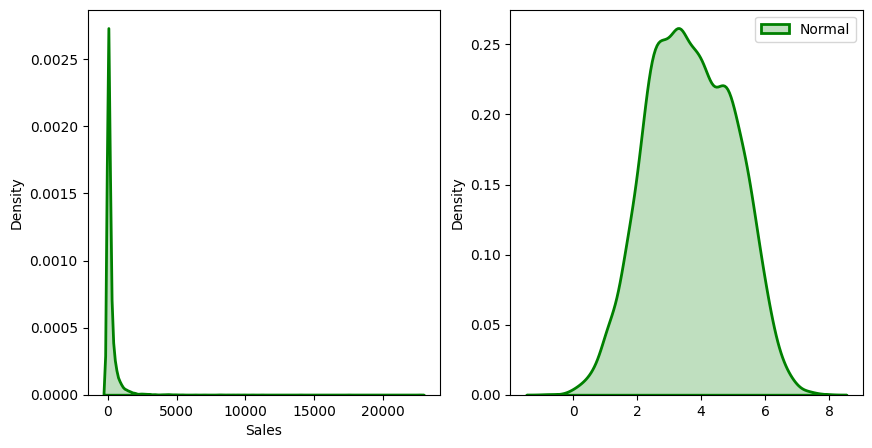

In [41]:
ohne_outlier_sales, fitted_lambda = stats.boxcox(ss1['Sales'])

fig, ax = plt.subplots(1, 2)
 
sns.distplot(ss1['Sales'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(ohne_outlier_sales, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
plt.legend(loc = "upper right")
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

Lambda value used for Transformation: 0.09933549161846916


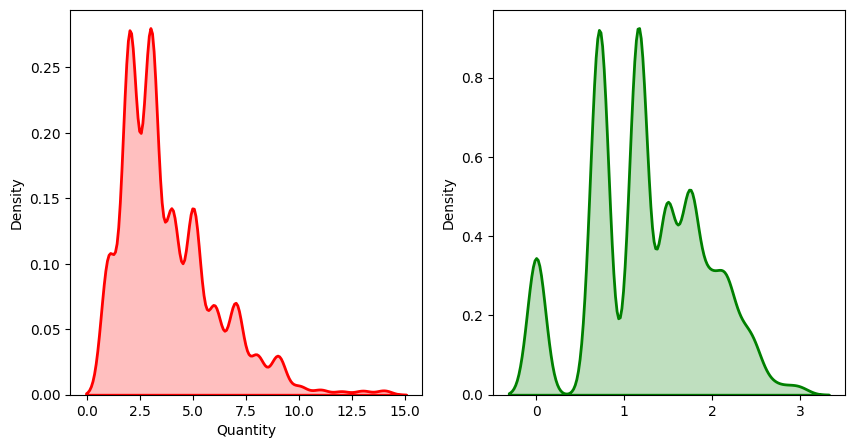

In [42]:
ohne_outlier_qty, fitted_lambda1 = stats.boxcox(ss1['Quantity'])

fig, ax = plt.subplots(1, 2)
 
sns.distplot(ss1['Quantity'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red", ax = ax[0])
 
sns.distplot(ohne_outlier_qty, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda1}")

In [43]:
# Get the indices of the outlier rows
outlier_indices = outliers.index

# Remove the outlier rows from the parent dataframe
ss2 = ss1.drop(outlier_indices)

print('Shape of the old dataset: ', ss1.shape)
print('Shape of the new dataset: ',ss2.shape)

Shape of the old dataset:  (9994, 21)
Shape of the new dataset:  (7143, 21)


In [44]:
ss2.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [45]:
# Feature Engineering for each column

# Feature Engineering for 'Ship Mode' column
# Convert categorical values to numerical using label encoding
label_encoder = LabelEncoder()
ss1['Ship Mode'] = label_encoder.fit_transform(ss1['Ship Mode'])

# Feature Engineering for 'Segment' column
# Convert categorical values to numerical using label encoding
ss1['Segment'] = label_encoder.fit_transform(ss1['Segment'])

# Feature Engineering for 'Region' column
# Convert categorical values to numerical using label encoding
ss1['Region'] = label_encoder.fit_transform(ss1['Region'])

# Feature Engineering for 'Category' column
# Convert categorical values to numerical using one-hot encoding
ss1 = pd.get_dummies(ss1, columns=['Category'])

# Feature Engineering for 'Sub-Category' column
# Convert categorical values to numerical using one-hot encoding
ss1 = pd.get_dummies(ss1, columns=['Sub-Category'])

# Feature Engineering for 'State' column
# Convert categorical values to numerical using one-hot encoding
ss1 = pd.get_dummies(ss1, columns=['State'])

# Feature Engineering for 'Order Date' column
# Perform log transformation to handle skewness
# Convert the 'Order Date' column to datetime format
ss1['Order Date'] = pd.to_datetime(ss1['Order Date'])
# Convert the 'Order Date' column to numeric representation (e.g., timestamp)
ss1['Order Date'] = ss1['Order Date'].astype(np.int64)
# Perform log transform on the 'Order Date' column
ss1['Order Date'] = np.log(ss1['Order Date'])
# Apply scaling to the 'Order Date' column
scaler = StandardScaler()
ss1['Order Date'] = scaler.fit_transform(ss1[['Order Date']])

# Feature Engineering for 'Quantity' column
# Perform log transformation to handle skewness
ss1['Quantity'] = np.log1p(ss1['Quantity'])

# Feature Engineering for 'Sales' column
# Perform log transformation to handle skewness
ss1['Sales'] = np.log1p(ss1['Sales'])

# Feature Engineering for 'Discount' column
# Perform log transformation to handle skewness
ss1['Discount'] = np.log1p(ss1['Discount'])

# Feature Engineering for 'Profit' column
def typ(x):
    if x<0.00:
        x=1
    elif x>0.00:
        x=0
    else:
        x=2
    return x
ss1['Profit'] = ss1['Profit'].apply(lambda x: typ(x))

# Feature Engineering for 'Customer ID' column
# Drop 'Customer ID' as it may not provide useful information for classification

# Feature Engineering for 'Product ID' column
# Drop 'Product ID' as it may not provide useful information for classification

# Feature Engineering for 'Postal Code' column
# Drop 'Postal Code' as it may not provide useful information for classification

# Feature Engineering for 'Country' column
# Drop 'Country' as it may not provide useful information for classification

# Prepare the dataset for classification modeling
# Separate features and target variable
X = ss1.drop(['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Product ID',
              'Postal Code', 'Country', 'Customer Name', 'City', 'Product Name',
              'Profit'], axis=1)
y = ss1['Profit']

In [46]:
X

,Order Date,Ship Mode,Segment,Region,Sales,Quantity,Discount,Category_Furniture,Category_Office Supplies,Category_Technology,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,0.464784,2,0,2,5.572002,1.098612,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.464784,2,0,2,6.597064,1.386294,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.114181,2,1,3,2.748552,1.098612,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.469063,3,0,2,6.865450,1.791759,0.371564,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.469063,3,0,2,3.151368,1.098612,0.182322,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,-2.004012,2,0,2,3.267590,1.386294,0.182322,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9990,0.721665,3,0,3,4.532169,1.098612,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9991,0.721665,3,0,3,5.559050,1.098612,0.182322,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9992,0.721665,3,0,3,3.421000,1.609438,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
y

0       0
1       0
2       0
3       1
4       0
       ..
9989    0
9990    0
9991    0
9992    0
9993    0
Name: Profit, Length: 9994, dtype: int64